# 1. Tool import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import roc_auc_score,classification_report, recall_score, f1_score,precision_recall_curve, auc,precision_score,roc_curve,confusion_matrix
import multiprocessing
from pycaret.classification import *
from sklearn.linear_model import LassoCV
import seaborn as sns
sns.set(font="AppleGothic",  # Mac 환경일 경우
        # font="Malgun Gothic",  # Windows 환경일 경우
        rc={"axes.unicode_minus": False})  # 마이너스 폰트 깨지는 문제 대처

# 2. 데이터 확보 및 전처리

In [2]:
df_SamA = pd.read_csv("samadult.csv")
df_SamC = pd.read_csv("samchild.csv")
df_Fam = pd.read_csv("familyxx.csv")

## 2.1 데이터 Feature Select

### 2.1.1 colum Name List (SampleAdult Feature)

In [3]:
# sampleadult.csv 데이터셋에서 추출할 컬럼 리스트
Adult_col = '''HHX
FMX
DIBEV1
AGE_P
SEX
AHEIGHT
AWEIGHTP
PREGFLYR
PREGNOW
AHCPLROU
CHLEV
HYPEV
HYPMED2
HYPMDEV2
INSLN1
AFLHC24_
AINTIL2W
ALCSTAT
SMKSTAT2
CIGAREV2
ECIGEV2
PIPEV2
SMKEV
SMKLSTB1
EPHEV
HISPAN_I
MRACBPI2
MRACRPI2
ASPMDMED
ASPMEDAD
ASPMEDEV
ASPONOWN
REGION
TIRED_1
ARTH1
BMI'''
Adult_col = Adult_col.split('\n')
print(len(Adult_col))

# 추출한 컬럼명을 대체할 컬럼명
Adult_newcol = '''HHX
FMX
DIBEV1
AGE
GENDER
HEIGHT
WEIGHT
PREGFLYR
PREGNOW
CPLROU
CHLEV
HYPEV
HYPMED2
HYPMDEV2
INSLN1
AFLHC24_
INTIL2W
ALCSTAT
SMKSTAT2
CIGAREV2
ECIGEV2
PIPEV2
SMKEV
SMKLSTB1
EPHEV
HISPAN_I
MRACBPI2
MRACRPI2
ASPMDMED
ASPMEDAD
ASPMEDEV
ASPONOWN
REGION
TIRED_1
ARTH1
BMI'''
Adult_newcol = Adult_newcol.split('\n')
print(len(Adult_newcol))

36
36


### 2.1.2 colum Name List (SampleChild Feature)

In [4]:
# samplechild.csv 데이터셋에서 추출할 컬럼 리스트 
SC_col ='''HHX
FMX
CCONDRR6
AGE_P
SEX
CHGHT_TC
CWGHT_TC
CHCPLROU
CINTIL2W
HISPAN_I
MRACBPI2
MRACRPI2
REGION
CCONDRR7
BMI_SC'''
SC_col = SC_col.split('\n')
print(len(SC_col))

# 추출한 컬럼명을 대체할 컬럼명
SC_newcol ='''HHX
FMX
DIBEV1
AGE
GENDER
HEIGHT
WEIGHT
CPLROU
INTIL2W
HISPAN_I
MRACBPI2
MRACRPI2
REGION
ARTH1
BMI'''
SC_newcol = SC_newcol.split('\n')
print(len(SC_newcol))

15
15


### 2.1.3 colum Name List (Family Feature)

In [5]:
fam_col = ['HHX','FMX','FSBALANC',]

### 2.1.4 Selected Feature에 따라 DataFrame 재정의

In [6]:
Adult_col
SC_col
fam_col 

df_SA0 = pd.DataFrame()
df_SC0 = pd.DataFrame()
df_FAM0 = pd.DataFrame()

for i in range(len(Adult_col)):
    df_SA0[Adult_col[i]] = df_SamA[Adult_col[i]]
    
for i in range(len(SC_col)):
    df_SC0[SC_col[i]] = df_SamC[SC_col[i]]

for i in range(len(fam_col)):
    df_FAM0[fam_col[i]] = df_Fam[fam_col[i]]

df_SA0.to_csv("adult.csv", index=False)
df_SC0.to_csv("child.csv", index=False)
df_FAM0.to_csv("family.csv", index=False)
df_FAM0.to_csv("family_newcol.csv", index=False)

## 2.2 데이터 Columns(Feature)Name 통일

In [7]:
df_SA = pd.read_csv("adult.csv")
df_SC = pd.read_csv("child.csv")

In [8]:
print(len(df_SA.columns))
print(len(Adult_col))
df_SA

36
36


,HHX,FMX,DIBEV1,AGE_P,SEX,AHEIGHT,AWEIGHTP,PREGFLYR,PREGNOW,AHCPLROU,...,MRACBPI2,MRACRPI2,ASPMDMED,ASPMEDAD,ASPMEDEV,ASPONOWN,REGION,TIRED_1,ARTH1,BMI
0,1,1,1,79,2,62,129,NaN,NaN,1.0,...,1,1,NaN,1.0,1.0,NaN,3,1,1,2358
1,6,1,2,37,1,71,235,NaN,NaN,2.0,...,1,1,NaN,NaN,NaN,NaN,3,2,2,3279
2,8,1,2,29,1,96,996,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,4363
3,9,1,2,75,1,66,138,NaN,NaN,1.0,...,7,11,NaN,1.0,1.0,NaN,3,2,1,2229
4,10,1,2,39,1,71,170,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,1,1,2,2372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25412,55556,3,2,19,2,63,118,2.0,2.0,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,2090
25413,55557,1,2,49,2,66,170,2.0,2.0,1.0,...,2,2,NaN,NaN,2.0,2.0,3,8,1,2745
25414,55560,1,2,40,2,68,170,2.0,2.0,1.0,...,1,1,NaN,NaN,2.0,2.0,3,4,1,2585
25415,55562,1,2,61,2,65,160,NaN,NaN,1.0,...,1,1,NaN,NaN,2.0,2.0,2,2,2,2663


### 2.2.1 Adult Feature 통일

In [9]:
df_newSA = pd.DataFrame()
Adult_col
Adult_newcol

for i in range(len(Adult_col)):
    df_newSA[Adult_newcol[i]] = df_SA[Adult_col[i]]
df_newSA.to_csv("adult_newcol.csv", index=False)
df_newSA

,HHX,FMX,DIBEV1,AGE,GENDER,HEIGHT,WEIGHT,PREGFLYR,PREGNOW,CPLROU,...,MRACBPI2,MRACRPI2,ASPMDMED,ASPMEDAD,ASPMEDEV,ASPONOWN,REGION,TIRED_1,ARTH1,BMI
0,1,1,1,79,2,62,129,NaN,NaN,1.0,...,1,1,NaN,1.0,1.0,NaN,3,1,1,2358
1,6,1,2,37,1,71,235,NaN,NaN,2.0,...,1,1,NaN,NaN,NaN,NaN,3,2,2,3279
2,8,1,2,29,1,96,996,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,4363
3,9,1,2,75,1,66,138,NaN,NaN,1.0,...,7,11,NaN,1.0,1.0,NaN,3,2,1,2229
4,10,1,2,39,1,71,170,NaN,NaN,1.0,...,1,1,NaN,NaN,NaN,NaN,1,1,2,2372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25412,55556,3,2,19,2,63,118,2.0,2.0,1.0,...,1,1,NaN,NaN,NaN,NaN,2,2,2,2090
25413,55557,1,2,49,2,66,170,2.0,2.0,1.0,...,2,2,NaN,NaN,2.0,2.0,3,8,1,2745
25414,55560,1,2,40,2,68,170,2.0,2.0,1.0,...,1,1,NaN,NaN,2.0,2.0,3,4,1,2585
25415,55562,1,2,61,2,65,160,NaN,NaN,1.0,...,1,1,NaN,NaN,2.0,2.0,2,2,2,2663


#### check. Feature Neme 변경 전후 비교(누락사항 점검)

In [10]:
len(df_SA.columns), len(df_newSA.columns)

(36, 36)

### 2.2.2 Child Feature 통일

In [11]:
df_newSC = pd.DataFrame()
SC_col
SC_newcol

for i in range(len(SC_col)):
    df_newSC[SC_newcol[i]] = df_SC[SC_col[i]]
df_newSC.to_csv("child_newcol.csv", index=False)
df_newSC

,HHX,FMX,DIBEV1,AGE,GENDER,HEIGHT,WEIGHT,CPLROU,INTIL2W,HISPAN_I,MRACBPI2,MRACRPI2,REGION,ARTH1,BMI
0,4,1,2,16,1,96.0,996.0,1.0,1,12,1,1,2,2,2687.0
1,6,1,2,9,1,NaN,NaN,1.0,2,12,1,1,3,2,NaN
2,8,1,2,3,1,NaN,NaN,1.0,2,12,1,1,2,2,NaN
3,10,1,2,0,1,NaN,NaN,1.0,2,12,1,1,1,2,NaN
4,13,1,2,10,1,NaN,NaN,1.0,2,12,2,2,3,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,55517,1,2,4,2,NaN,NaN,1.0,2,12,1,1,2,2,NaN
8265,55526,1,2,2,1,NaN,NaN,1.0,2,12,2,2,3,2,NaN
8266,55530,1,2,11,1,NaN,NaN,2.0,2,12,1,1,2,2,NaN
8267,55538,1,2,14,2,61.0,125.0,1.0,2,12,1,1,3,2,2363.0


#### check. Feature Neme 변경 전후 비교(누락사항 점검)

In [12]:
len(df_SC.columns), len(df_newSC.columns)

(15, 15)

## 2.3 전처리용 Feature(Columns 이후 Feature) Name 통일된 파일 Read

In [13]:
new_fam = pd.read_csv('family_newcol.csv')
new_adult = pd.read_csv('adult_newcol.csv')
new_child = pd.read_csv('child_newcol.csv')

## 2.4 데이터 통합(mgerge)를 위한 id생성

In [14]:
# key컬럼들을 사용하여 id컬럼 생성
new_fam['id'] = '1000' + new_fam['HHX'].astype('str') + new_fam['FMX'].astype('str')
new_adult['id'] = '1000' + new_adult['HHX'].astype('str') + new_adult['FMX'].astype('str')
new_child['id'] = '1000' + new_child['HHX'].astype('str') + new_child['FMX'].astype('str')
# 'HHX','FMX' 제거
new_fam.drop(['HHX','FMX'],inplace=True,axis=1)
new_adult.drop(['HHX','FMX'],inplace=True,axis=1)
new_child.drop(['HHX','FMX'],inplace=True,axis=1)

## 2.5 데이터 Merge & 통합 option(combine_first)

In [15]:
# family 데이터프레임에 adult 데이터 프레임 merge
fam_adult = pd.merge(new_fam,new_adult,how='left',on='id')
# combine_first() 를 이용해 병합
total = fam_adult.combine_first(new_child)

### 2.5.1 데이터 확인

In [16]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30309 entries, 0 to 30308
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AFLHC24_  10874 non-null  float64
 1   AGE       26760 non-null  float64
 2   ALCSTAT   25417 non-null  float64
 3   ARTH1     26760 non-null  float64
 4   ASPMDMED  1235 non-null   float64
 5   ASPMEDAD  5955 non-null   float64
 6   ASPMEDEV  17659 non-null  float64
 7   ASPONOWN  11703 non-null  float64
 8   BMI       25906 non-null  float64
 9   CHLEV     25417 non-null  float64
 10  CIGAREV2  25417 non-null  float64
 11  CPLROU    24134 non-null  float64
 12  DIBEV1    26760 non-null  float64
 13  ECIGEV2   25417 non-null  float64
 14  EPHEV     25417 non-null  float64
 15  FSBALANC  30309 non-null  int64  
 16  GENDER    26760 non-null  float64
 17  HEIGHT    25906 non-null  float64
 18  HISPAN_I  26760 non-null  float64
 19  HYPEV     25417 non-null  float64
 20  HYPMDEV2  9217 non-null   fl

In [17]:
total.describe()

,AFLHC24_,AGE,ALCSTAT,ARTH1,ASPMDMED,ASPMEDAD,ASPMEDEV,ASPONOWN,BMI,CHLEV,...,MRACRPI2,PIPEV2,PREGFLYR,PREGNOW,REGION,SMKEV,SMKLSTB1,SMKSTAT2,TIRED_1,WEIGHT
count,10874.000000,26760.000000,25417.000000,26760.000000,1235.000000,5955.000000,17659.000000,11703.000000,25906.000000,25417.000000,...,26760.000000,25417.000000,6003.000000,6117.000000,26760.000000,25417.000000,25417.000000,25417.000000,25417.000000,25906.000000
mean,2.059684,49.535575,4.767439,1.740060,1.625911,1.211419,1.678634,1.930274,3031.741604,1.710233,...,1.838490,1.883031,1.952191,1.981036,2.678849,1.623402,1.910532,3.361176,2.124011,249.994017
std,0.709299,20.213238,2.391790,0.508085,0.679147,0.441549,0.582198,0.348974,1410.607426,0.611275,...,2.757552,0.490276,0.244663,0.307897,1.008504,0.607411,0.438209,1.031995,1.351492,238.390641
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1171.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000
25%,2.000000,33.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2372.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,150.000000
50%,2.000000,51.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2727.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,177.000000
75%,2.000000,66.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3180.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,215.000000
max,9.000000,85.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9.000000,...,17.000000,9.000000,9.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,999.000000


In [18]:
total.isnull().sum()

AFLHC24_    19435
AGE          3549
ALCSTAT      4892
ARTH1        3549
ASPMDMED    29074
ASPMEDAD    24354
ASPMEDEV    12650
ASPONOWN    18606
BMI          4403
CHLEV        4892
CIGAREV2     4892
CPLROU       6175
DIBEV1       3549
ECIGEV2      4892
EPHEV        4892
FSBALANC        0
GENDER       3549
HEIGHT       4403
HISPAN_I     3549
HYPEV        4892
HYPMDEV2    21092
HYPMED2     22082
INSLN1      25540
INTIL2W      3549
MRACBPI2     3549
MRACRPI2     3549
PIPEV2       4892
PREGFLYR    24306
PREGNOW     24192
REGION       3549
SMKEV        4892
SMKLSTB1     4892
SMKSTAT2     4892
TIRED_1      4892
WEIGHT       4403
id              0
dtype: int64

- child의 키와 몸무게에 대다수가 결측치
- 그러면 어떻게 채울까? 너무 어린 나이는 필요없다고 판단하여 12세 이상부터만 가져올 것
- Adult의 HYPMDEV2는 당뇨약 복용 유무로써 nan값은 no로 대치하는 것이 나을 듯 함 yes(1)만 남기고 나머지는 전부 no(2 or 0)으로 처리
- Adult의 INSLN1 결측치 다수 존재 - 당뇨병과 너무 결과론적인 데이터? --> 사용하지 않는것이 맞을 듯 함
- Adult의 AFLH24_ 하위에 2주간 구토/설사 동반한 위문제 컬럼이 있으므로, 사용하지 않아도 될 듯
- AINTIL2W,CINTIL2W - 구토/ 설사 동반 위 문제 컬럼으로 사용.
- Adult의 EPHEV는 폐기종으로 당뇨병과 합병증으로 자주 발생하는 병 / 사용.
- MRACBPI2,MRACRPI2 인종 관련된 컬럼으로 사용해도 무방할 듯 --> 미국내에서 아시아인이 당뇨병 환자 2순위
- REGION : 지역간 식이 차이에 따라서도 당뇨병 발병 차이가 있음 pd.crosstab(df_adult['REGION'],df_adult['DIBEV1'])
- 아스피린 관련은 결측치가 너무 많으므로 제외

## 2.6 전처리 :  AGE 12세 이상

- 11세 이하의 경우 당뇨 유무 컬럼이 모두 결측치 -> 당뇨가 아니다라고 결측치를 채운다 가정하면

    당뇨 데이터의 분포가 불균등 분포(당뇨x 9 : 당뇨 1)이기 때문에 머신러닝 성능에 큰 도움이 되지 않을거라 판단하여
    
    11세 이하의 데이터는 삭제

In [19]:
# child 12세 이상
total = total[total['AGE'] >= 12]

## 2.7 전처리 : HYPMDEV2(고혈압) yes(1) 外 no(2 or 0)

In [20]:
# yes(1)만 남기고 나머지는 전부 no(2 or 0)으로 처리
total['HYPMDEV2'] = total['HYPMDEV2'].apply(lambda x: x if x == 1.0 else 2)

## 2.8 전처리 : 결측치가 90퍼센트 이상인 feature 제거

In [21]:
total = total.drop(['INSLN1','AFLHC24_','ASPMDMED','ASPMEDAD','ASPMEDEV','ASPONOWN'],axis=1)

In [22]:
total

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,ECIGEV2,EPHEV,...,PIPEV2,PREGFLYR,PREGNOW,REGION,SMKEV,SMKLSTB1,SMKSTAT2,TIRED_1,WEIGHT,id
0,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,NaN,NaN,3.0,1.0,2.0,3.0,1.0,129.0,100011
2,37.0,7.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,3.0,2.0,2.0,4.0,2.0,235.0,100061
3,29.0,6.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,NaN,NaN,2.0,2.0,2.0,4.0,2.0,996.0,100081
4,75.0,3.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,NaN,NaN,3.0,1.0,2.0,3.0,2.0,138.0,100091
5,39.0,6.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,1.0,2.0,2.0,4.0,1.0,170.0,1000101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,118.0,1000555563
30305,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,4.0,8.0,170.0,1000555571
30306,40.0,3.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,1.0,2.0,3.0,4.0,170.0,1000555601
30307,61.0,5.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,NaN,NaN,2.0,2.0,2.0,4.0,2.0,160.0,1000555621


## 2.9 결측치 처리

In [23]:
total.shape

(25906, 30)

In [24]:
total.isnull().sum()

AGE             0
ALCSTAT       489
ARTH1           0
BMI             0
CHLEV         489
CIGAREV2      489
CPLROU       2595
DIBEV1          0
ECIGEV2       489
EPHEV         489
FSBALANC        0
GENDER          0
HEIGHT          0
HISPAN_I        0
HYPEV         489
HYPMDEV2        0
HYPMED2     17679
INTIL2W         0
MRACBPI2        0
MRACRPI2        0
PIPEV2        489
PREGFLYR    19903
PREGNOW     19789
REGION          0
SMKEV         489
SMKLSTB1      489
SMKSTAT2      489
TIRED_1       489
WEIGHT          0
id              0
dtype: int64

### 2.9.1 결측치 : 결측 Feature 목록화 및 처리
- ['ALCSTAT','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMED2','SMKSTAT2','TIRED_1']

- 단순 응답 관련 된 feature는 이진 데이터로 처리

In [25]:
col_list = ['ALCSTAT','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMED2','SMKSTAT2','TIRED_1']

In [26]:
for i in col_list:
    total[i] = total[i].apply(lambda x: x if x == 1.0 else 2)

In [27]:
total.isnull().sum()

AGE             0
ALCSTAT         0
ARTH1           0
BMI             0
CHLEV           0
CIGAREV2        0
CPLROU          0
DIBEV1          0
ECIGEV2       489
EPHEV           0
FSBALANC        0
GENDER          0
HEIGHT          0
HISPAN_I        0
HYPEV           0
HYPMDEV2        0
HYPMED2         0
INTIL2W         0
MRACBPI2        0
MRACRPI2        0
PIPEV2        489
PREGFLYR    19903
PREGNOW     19789
REGION          0
SMKEV         489
SMKLSTB1      489
SMKSTAT2        0
TIRED_1         0
WEIGHT          0
id              0
dtype: int64

### 2.9.2 결측치 : PREGNOW / PREGFLYR(임신)

- 현재 임신, 최근 임신으로 임신 유무로 컬럼 통합

In [28]:
total['PREG'] = 1
total.loc[(total['PREGNOW'] == 2)&(total['PREGFLYR'] == 2),'PREG'] = 2

In [29]:
total = total.drop(['PREGFLYR','PREGNOW'],axis=1)

In [30]:
total

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,ECIGEV2,EPHEV,...,MRACRPI2,PIPEV2,REGION,SMKEV,SMKLSTB1,SMKSTAT2,TIRED_1,WEIGHT,id,PREG
0,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,2.0,...,1.0,2.0,3.0,1.0,2.0,2.0,1.0,129.0,100011,1
2,37.0,2.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1.0,2.0,3.0,2.0,2.0,2.0,2.0,235.0,100061,1
3,29.0,2.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,996.0,100081,1
4,75.0,2.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,2.0,...,11.0,1.0,3.0,1.0,2.0,2.0,2.0,138.0,100091,1
5,39.0,2.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,170.0,1000101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,118.0,1000555563,2
30305,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,170.0,1000555571,2
30306,40.0,2.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,3.0,1.0,2.0,2.0,2.0,170.0,1000555601,2
30307,61.0,2.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,160.0,1000555621,1


### 2.9.3 결측치 : 불필요 feature 제거
* ['ECIGEV2','PIPEV2','SMKEV','SMKLSTB1','PREGFLYR','PREGNOW']

- 흡연 관련 컬럼은 SMKSTAT2만 남기고 삭제

In [31]:
# 나머지 필요없는 컬럼 제거
total = total.drop(['ECIGEV2','PIPEV2','SMKEV','SMKLSTB1'],axis=1)

In [32]:
total.isnull().sum()

AGE         0
ALCSTAT     0
ARTH1       0
BMI         0
CHLEV       0
CIGAREV2    0
CPLROU      0
DIBEV1      0
EPHEV       0
FSBALANC    0
GENDER      0
HEIGHT      0
HISPAN_I    0
HYPEV       0
HYPMDEV2    0
HYPMED2     0
INTIL2W     0
MRACBPI2    0
MRACRPI2    0
REGION      0
SMKSTAT2    0
TIRED_1     0
WEIGHT      0
id          0
PREG        0
dtype: int64

In [33]:
# 'id' 컬럼 맨 앞으로 옮기기
column_id = total.pop(total.columns[-2])
total.insert(0, column_id.name, column_id)

In [34]:
total.shape

(25906, 25)

In [35]:
total

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,EPHEV,...,HYPMDEV2,HYPMED2,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,WEIGHT,PREG
0,100011,79.0,2.0,1.0,2358.0,1.0,2.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,129.0,1
2,100061,37.0,2.0,2.0,3279.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,235.0,1
3,100081,29.0,2.0,2.0,4363.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,996.0,1
4,100091,75.0,2.0,1.0,2229.0,1.0,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,7.0,11.0,3.0,2.0,2.0,138.0,1
5,1000101,39.0,2.0,2.0,2372.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,170.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30304,1000555563,19.0,1.0,2.0,2090.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,118.0,2
30305,1000555571,49.0,1.0,1.0,2745.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,170.0,2
30306,1000555601,40.0,2.0,1.0,2585.0,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,170.0,2
30307,1000555621,61.0,2.0,2.0,2663.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,160.0,1


## 2.10 이상치 : 키, 몸무게 이상값 제거

In [36]:
total.describe()
#BMI 최대값 9999.000000로 이상치 존재

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,DIBEV1,EPHEV,FSBALANC,...,HYPMDEV2,HYPMED2,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,WEIGHT,PREG
count,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,...,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000,25906.000000
mean,50.988381,1.826295,1.731221,3031.741604,1.694202,1.726897,1.151316,1.919671,1.980892,2.871922,...,1.682429,1.714854,1.952212,2.392342,1.832548,2.677797,1.890604,1.706709,249.994017,1.219524
std,18.854454,0.378863,0.512175,1410.607426,0.460753,0.445562,0.358364,0.401687,0.136906,0.439290,...,0.465541,0.451493,0.269310,3.900293,2.743472,1.009156,0.312141,0.455280,238.390641,0.413932
min,12.000000,1.000000,1.000000,1171.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000
25%,35.000000,2.000000,1.000000,2372.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,150.000000,1.000000
50%,52.000000,2.000000,2.000000,2727.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,177.000000,1.000000
75%,66.000000,2.000000,2.000000,3180.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,215.000000,1.000000
max,85.000000,2.000000,9.000000,9999.000000,2.000000,2.000000,2.000000,9.000000,2.000000,9.000000,...,2.000000,2.000000,9.000000,17.000000,17.000000,4.000000,2.000000,2.000000,999.000000,2.000000


In [37]:
outliers = total.loc[:,['BMI','WEIGHT','HEIGHT','AGE']]

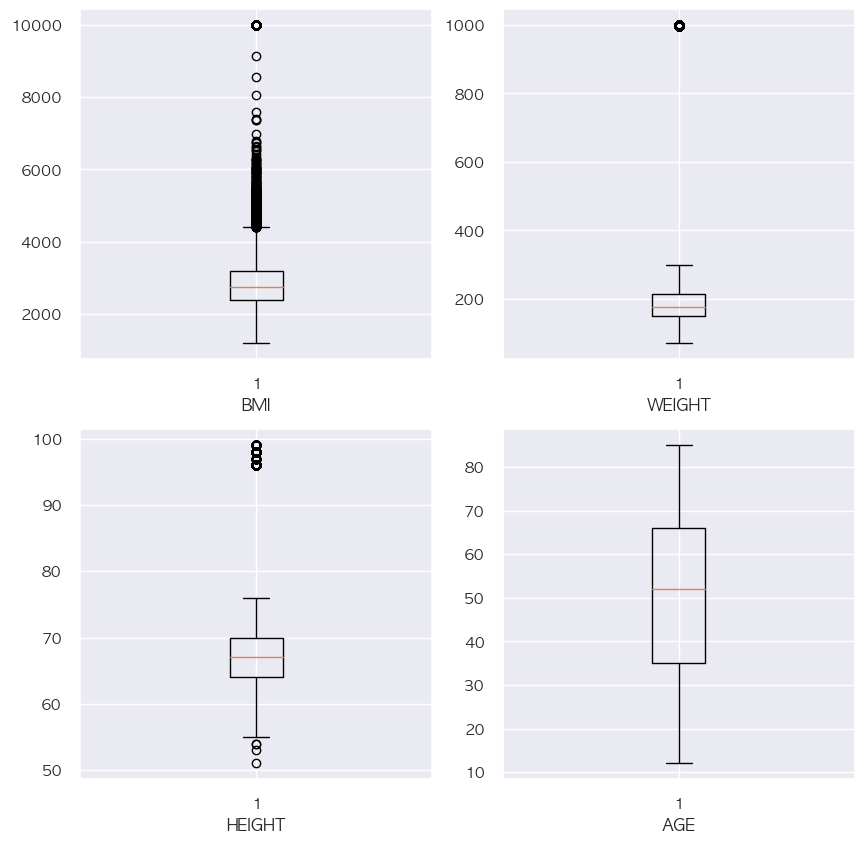

In [38]:
plt.figure(figsize=(10,10))
for i,col in enumerate(outliers.columns,start=1):
    plt.subplot(2,2,i)
    plt.boxplot(outliers[col])
    plt.xlabel(col)
plt.show()

In [39]:
# 문서 조사 결과 몸무게  / 키 / BMI 데이터 중 정상 범위 이외의 응답(무응답,거절 등..)은 99 9999등으로 설문됨
# 따라서 정상 범위외 데이터 삭제
total = total[(total['HEIGHT'] < 96)&(total['WEIGHT'] < 996)]

### 2.10.1) BMI 재계산을 위헤 단위변경[키(인치→cm), 몸무게(파운드→ kg)]

In [40]:
total['HEIGHT(cm)'] = total['HEIGHT']*2.54
total['WEIGHT(kg)'] = total['WEIGHT']*0.453592
total.drop(['HEIGHT','WEIGHT'],axis=1,inplace=True)

In [41]:
total['BMI'] = total['WEIGHT(kg)'] / ((total['HEIGHT(cm)']/100)**2)

In [42]:
remove_outlier = total.loc[:,['BMI','WEIGHT(kg)','HEIGHT(cm)','AGE']]
remove_outlier.describe()

,BMI,WEIGHT(kg),HEIGHT(cm),AGE
count,23524.000000,23524.000000,23524.000000,23524.000000
mean,27.657832,79.773883,169.575017,51.019087
std,5.524329,18.116680,9.935051,18.791325
min,13.312549,31.751440,129.540000,12.000000
25%,23.627608,65.770840,162.560000,35.000000
50%,26.728731,77.110640,170.180000,52.000000
75%,30.896587,90.718400,177.800000,66.000000
max,53.316066,135.624008,193.040000,85.000000


## 2.11 Target 확인 및 위치 변경 (Target 분리 목적 : y)

In [43]:
# Target 맨 뒤로 옮기기
column_target = total.pop('DIBEV1')
total.insert(24, column_target.name, column_target)

In [44]:
# 인덱스 reset
total = total.reset_index(drop=True)

In [45]:
total

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,2.0,1.0,23.594147,1.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,1.0,1,157.48,58.513368,1.0
1,100061,37.0,2.0,2.0,32.775484,1.0,1.0,2.0,2.0,3,...,2.0,1.0,1.0,3.0,2.0,2.0,1,180.34,106.594120,2.0
2,100091,75.0,2.0,1.0,22.273536,1.0,1.0,1.0,2.0,1,...,2.0,7.0,11.0,3.0,2.0,2.0,1,167.64,62.595696,2.0
3,1000101,39.0,2.0,2.0,23.709925,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,1.0,2.0,1.0,1,180.34,77.110640,2.0
4,1000131,54.0,1.0,2.0,38.273579,1.0,2.0,1.0,2.0,3,...,2.0,2.0,2.0,3.0,2.0,1.0,1,165.10,104.326160,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1000555563,19.0,1.0,2.0,20.902530,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,2,160.02,53.523856,2.0
23520,1000555571,49.0,1.0,1.0,27.438414,1.0,2.0,1.0,2.0,2,...,2.0,2.0,2.0,3.0,2.0,2.0,2,167.64,77.110640,2.0
23521,1000555601,40.0,2.0,1.0,25.848125,1.0,1.0,1.0,2.0,3,...,1.0,1.0,1.0,3.0,2.0,2.0,2,172.72,77.110640,2.0
23522,1000555621,61.0,2.0,2.0,26.625098,2.0,2.0,1.0,2.0,3,...,2.0,1.0,1.0,2.0,2.0,2.0,1,165.10,72.574720,2.0


## 2.12 최종 점검 논의 (데이터 이진화 및 변경 [(1,2) → (0,1) 外])

In [46]:
total.columns

Index(['id', 'AGE', 'ALCSTAT', 'ARTH1', 'BMI', 'CHLEV', 'CIGAREV2', 'CPLROU',
       'EPHEV', 'FSBALANC', 'GENDER', 'HISPAN_I', 'HYPEV', 'HYPMDEV2',
       'HYPMED2', 'INTIL2W', 'MRACBPI2', 'MRACRPI2', 'REGION', 'SMKSTAT2',
       'TIRED_1', 'PREG', 'HEIGHT(cm)', 'WEIGHT(kg)', 'DIBEV1'],
      dtype='object')

In [47]:
total['PREG'].value_counts()

1    18391
2     5133
Name: PREG, dtype: int64

### 2.12.1 답변값 통일 (0:아니요, 1:예)

In [48]:
# 'DIBEV1' 변경 : 2,7,8,9 → 0(아니오), 1,3 → 1 (예),  8은 데이터가 없음 

total['DIBEV1'] = total['DIBEV1'].apply(lambda x: 1 if x in(1,3) else 0)

In [49]:
# 0: 아니오, 1: 예로 통일함

change_0 = ['ALCSTAT','ARTH1','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMDEV2','HYPMED2','INTIL2W','SMKSTAT2','TIRED_1','PREG']

for i in change_0:
    total[i] = total[i].apply(lambda x: x if x == 1 else 0)

In [50]:
# 성별 변경 : 1남자, 2여자  → 0남자, 1여자
total['GENDER'] = total['GENDER'] - 1

In [51]:
total['GENDER'].unique()

array([1., 0.])

In [52]:
# 변경 : 1,2,7 → 0 (아니오), 3,9 → 1(예), 8은 데이터가 없음
total['FSBALANC'] = total['FSBALANC'].apply(lambda x: 0 if x in(3,9) else 1)

## 2.13 17세 이하 데이터 제거 후 파일(CSV)저장

17세 이하는 당뇨 데이터가 416 대 1로 학습에 큰 도움에 안된다고 판단

In [53]:
total.loc[total['AGE'] <= 17,'DIBEV1'].value_counts()

0    416
1      1
Name: DIBEV1, dtype: int64

In [54]:
# 18세 이상 데이터만 가져오기
total = total[total['AGE'] >= 18]

In [55]:
# 인덱스 리셋
total = total.reset_index(drop=True)

In [56]:
# 확인
total

,id,AGE,ALCSTAT,ARTH1,BMI,CHLEV,CIGAREV2,CPLROU,EPHEV,FSBALANC,...,INTIL2W,MRACBPI2,MRACRPI2,REGION,SMKSTAT2,TIRED_1,PREG,HEIGHT(cm),WEIGHT(kg),DIBEV1
0,100011,79.0,0.0,1.0,23.594147,1.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,3.0,0.0,1.0,1,157.48,58.513368,1
1,100061,37.0,0.0,0.0,32.775484,1.0,1.0,0.0,0.0,0,...,0.0,1.0,1.0,3.0,0.0,0.0,1,180.34,106.594120,0
2,100091,75.0,0.0,1.0,22.273536,1.0,1.0,1.0,0.0,1,...,0.0,7.0,11.0,3.0,0.0,0.0,1,167.64,62.595696,0
3,1000101,39.0,0.0,0.0,23.709925,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,180.34,77.110640,0
4,1000131,54.0,1.0,0.0,38.273579,1.0,0.0,1.0,0.0,0,...,0.0,2.0,2.0,3.0,0.0,1.0,1,165.10,104.326160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,1000555563,19.0,1.0,0.0,20.902530,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,2.0,0.0,0.0,0,160.02,53.523856,0
23103,1000555571,49.0,1.0,1.0,27.438414,1.0,0.0,1.0,0.0,1,...,0.0,2.0,2.0,3.0,0.0,0.0,0,167.64,77.110640,0
23104,1000555601,40.0,0.0,1.0,25.848125,1.0,1.0,1.0,0.0,0,...,1.0,1.0,1.0,3.0,0.0,0.0,0,172.72,77.110640,0
23105,1000555621,61.0,0.0,0.0,26.625098,0.0,0.0,1.0,0.0,0,...,0.0,1.0,1.0,2.0,0.0,0.0,1,165.10,72.574720,0


In [57]:
# csv 파일로 저장
total.to_csv('Data_preprocessing(over18).csv',index=False)

# 3. EDA 

## 3.1 pygwaker를 통한 시각화 확인

In [58]:
import pygwalker as pyg
pyg.walk(total)

Box(children=(HTML(value='<div id="ifr-pyg-00060e29c9193f1eg8Pe2yVRcXw7lFLb" style="height: auto">\n    <head>…

## 3.2 bar그래프를 통한 DEBEV1과 각 컬럼 비율 확인

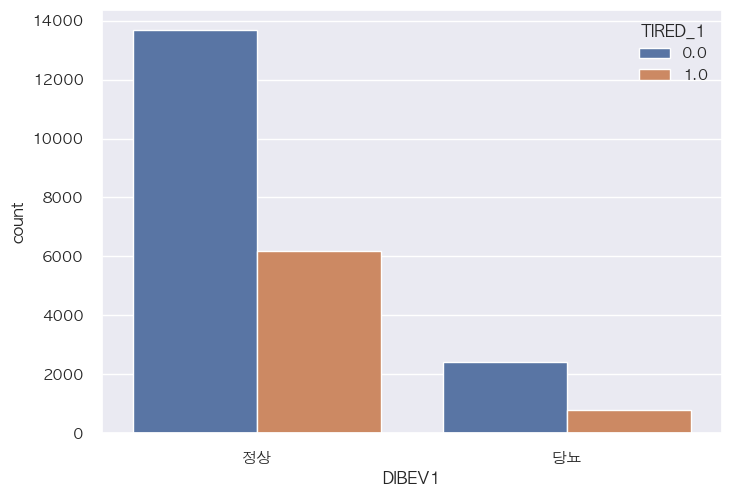

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='DIBEV1', hue='TIRED_1', data=total)
plt.xticks(ticks=[0,1],labels=['정상','당뇨'])
plt.show()

- bar그래프는 얼마만큼의 비율을 차지하는지, 연관성이 있는지 눈으로 확인하기가 어려움

## 3.3 pie그래프를 통한 DEBEV1과 각 컬럼 비율 확인

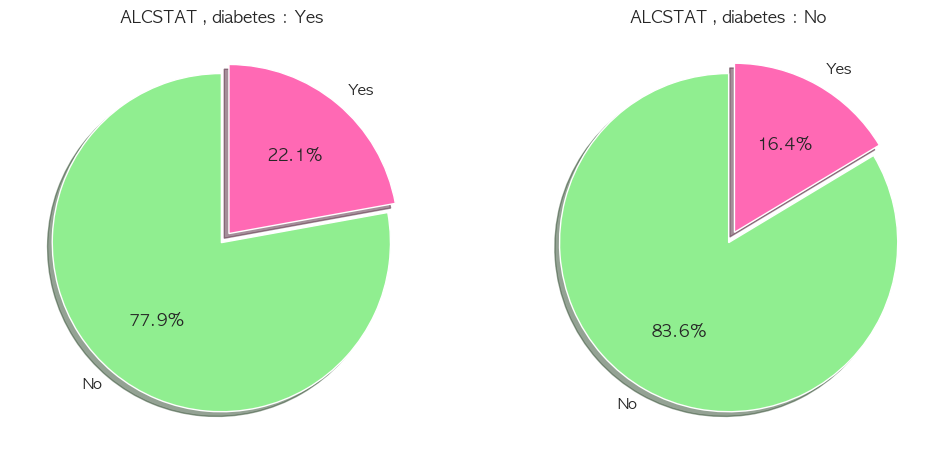

diabetes, Yes : 0.22146822948797038
diabetes, No : 0.16380568839667758
ratio : 0.7396351556852768
--------------------------------------------------------------------------------------------------------------------------------------------


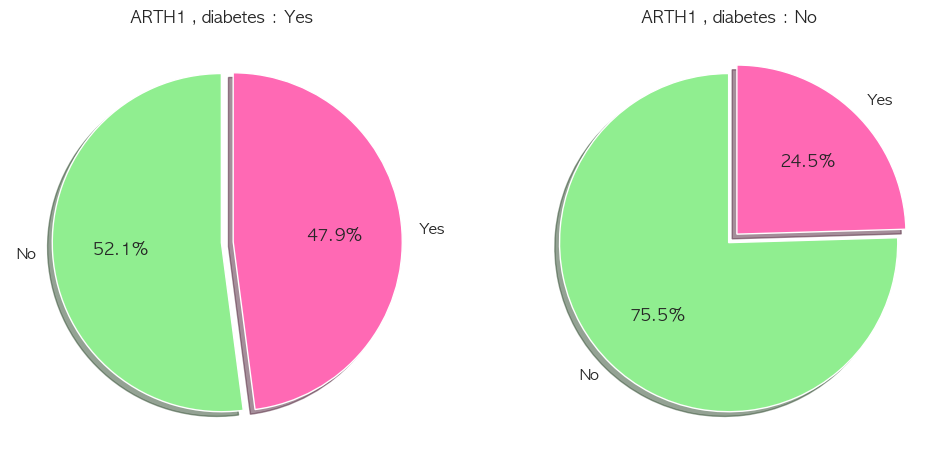

diabetes, Yes : 0.4793337446020975
diabetes, No : 0.24535615403976843
ratio : 0.511869145043069
--------------------------------------------------------------------------------------------------------------------------------------------


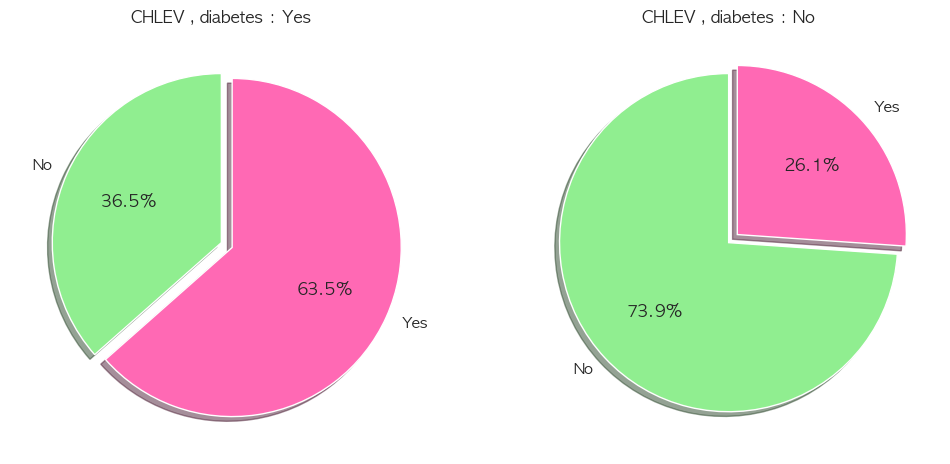

diabetes, Yes : 0.634793337446021
diabetes, No : 0.2609111502642839
ratio : 0.41101746800622374
--------------------------------------------------------------------------------------------------------------------------------------------


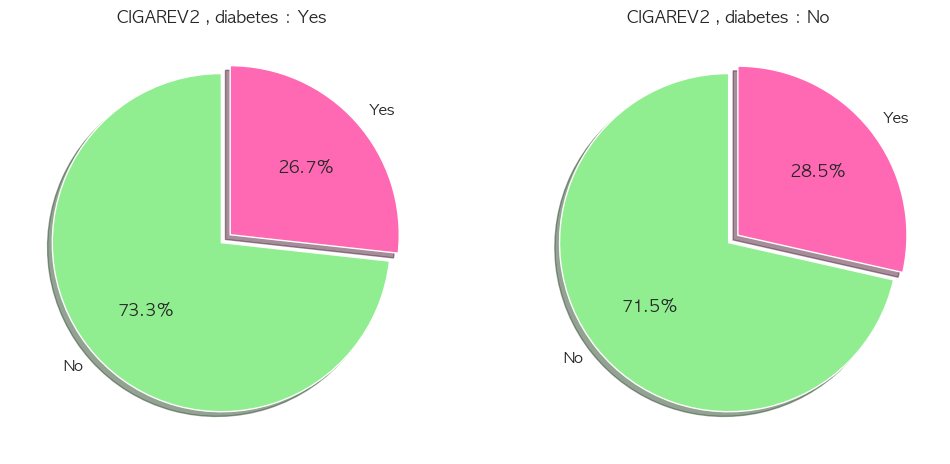

diabetes, Yes : 0.26742751388032077
diabetes, No : 0.28537628995721115
ratio : 0.9371048797376208
--------------------------------------------------------------------------------------------------------------------------------------------


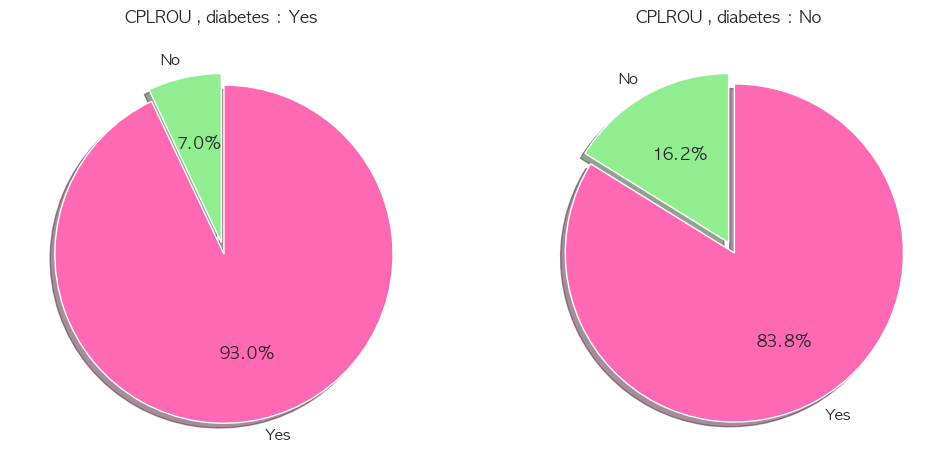

diabetes, Yes : 0.9296730413325108
diabetes, No : 0.8384092625220236
ratio : 0.9018323918700731
--------------------------------------------------------------------------------------------------------------------------------------------


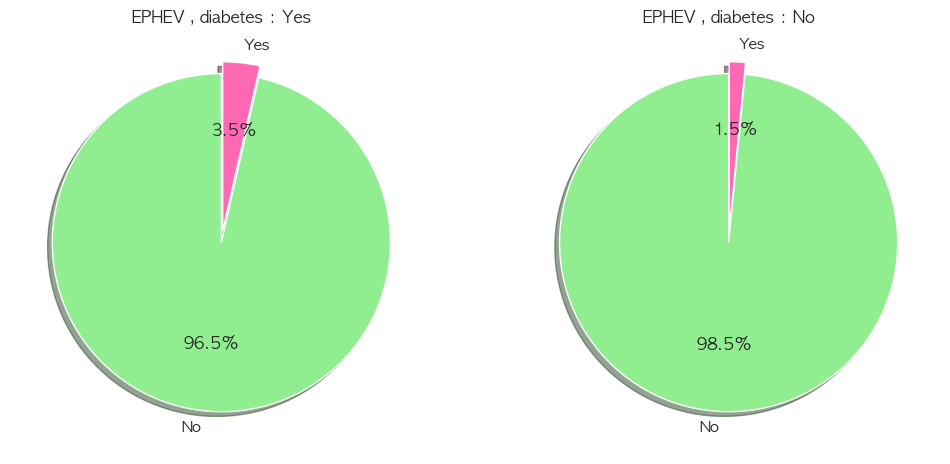

diabetes, Yes : 0.035471930906847624
diabetes, No : 0.015454316637301787
ratio : 0.4356773438098469
--------------------------------------------------------------------------------------------------------------------------------------------


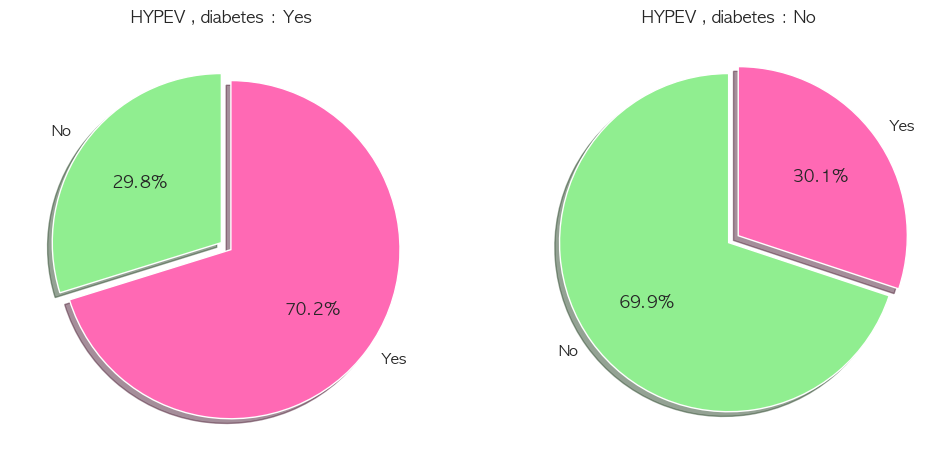

diabetes, Yes : 0.7020357803824799
diabetes, No : 0.30093128618172665
ratio : 0.42865519762792526
--------------------------------------------------------------------------------------------------------------------------------------------


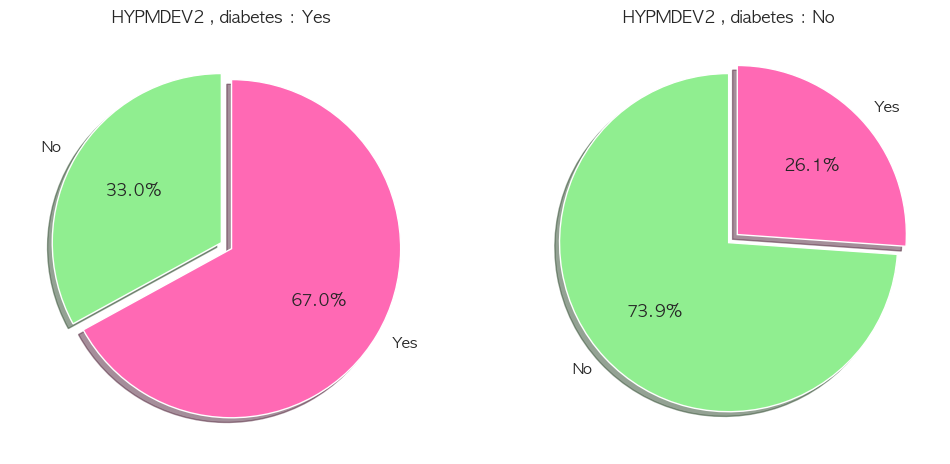

diabetes, Yes : 0.6702652683528686
diabetes, No : 0.2610621696451045
ratio : 0.3894908209799488
--------------------------------------------------------------------------------------------------------------------------------------------


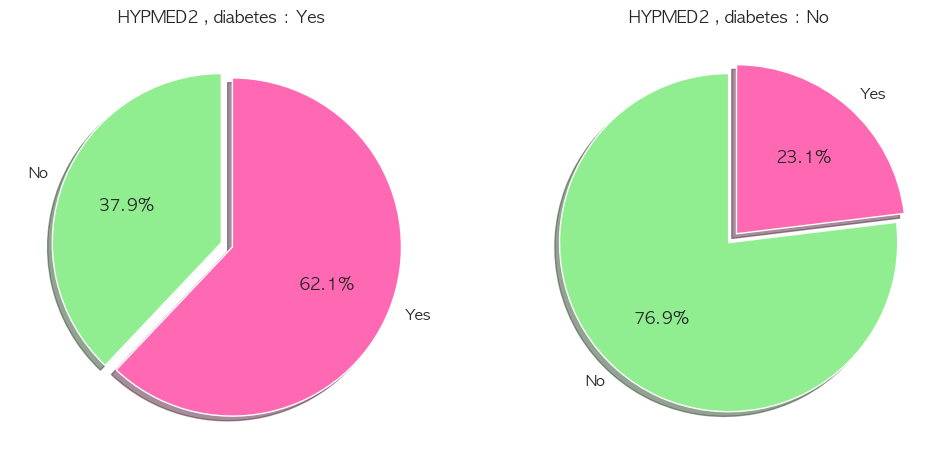

diabetes, Yes : 0.6206045650832819
diabetes, No : 0.23080795368738988
ratio : 0.37190824346646023
--------------------------------------------------------------------------------------------------------------------------------------------


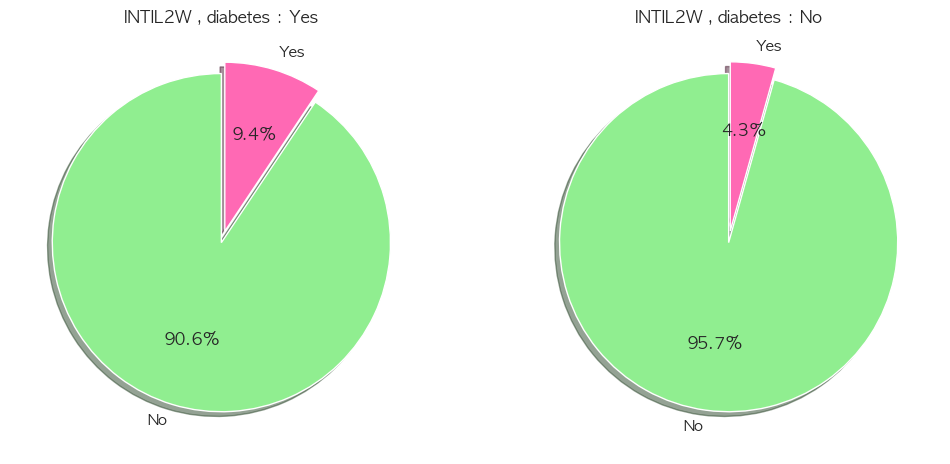

diabetes, Yes : 0.09376927822331894
diabetes, No : 0.04339290208910143
ratio : 0.46276246241074614
--------------------------------------------------------------------------------------------------------------------------------------------


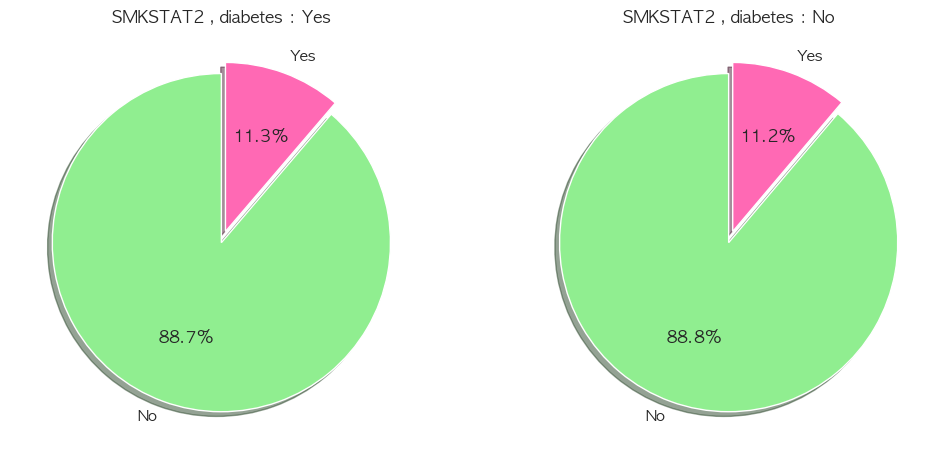

diabetes, Yes : 0.11258482418260334
diabetes, No : 0.11175434180719859
ratio : 0.9926234962710625
--------------------------------------------------------------------------------------------------------------------------------------------


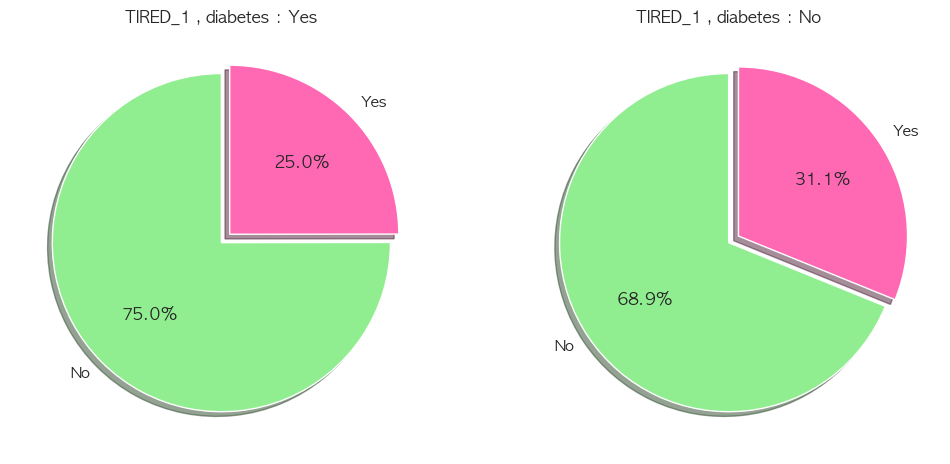

diabetes, Yes : 0.2498457742134485
diabetes, No : 0.3114523030455575
ratio : 0.8021959438742775
--------------------------------------------------------------------------------------------------------------------------------------------


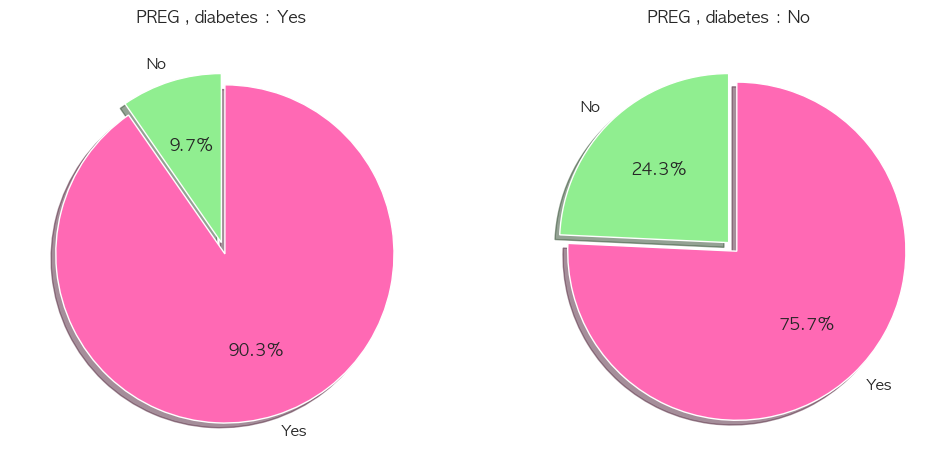

diabetes, Yes : 0.9034546576187539
diabetes, No : 0.7573621948150012
ratio : 0.8382957444828385
--------------------------------------------------------------------------------------------------------------------------------------------


In [60]:
# 0,1로 이루어진 columns 리스트 
countplot_list = ['ALCSTAT','ARTH1','CHLEV','CIGAREV2','CPLROU','EPHEV','HYPEV','HYPMDEV2','HYPMED2','INTIL2W','SMKSTAT2','TIRED_1','PREG']

# for문을 이용해 당뇨병이 0과 1일때 각 컬럼의 비율을 나타낸 파이 그래프 생성
for i in countplot_list:
    count_1 = total[total['DIBEV1'] == 1][i].value_counts().sort_index() # DIBEV1가 yes 일 때 리스트 안의 컬럼들 count
    count_0 = total[total['DIBEV1'] == 0][i].value_counts().sort_index() # DIBEV1가 no 일 때 리스트 안의 컬럼들 count
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#    print(count_1)
    axes[0].pie(count_1, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode =(0,0.07), shadow=True, colors=('lightgreen','hotpink'))
#    axes[0].pie(count_1, labels=[0.0, 1.0], autopct='%1.1f%%', startangle=90, colors=('g','b'))
    axes[0].set_title(f'{i} , diabetes : Yes')
#    print(count_0)
#    axes[1].pie(count_0, labels=[0.0, 1.0], autopct='%1.1f%%', startangle=90, colors=('g','b'))
    axes[1].pie(count_0, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode =(0,0.07), shadow=True, colors=('lightgreen','hotpink'))
    axes[1].set_title(f'{i} , diabetes : No')
    plt.show()
    a = count_1[1] / (count_1[0] + count_1[1])
    b = count_0[1] / (count_0[0] + count_0[1])
    print(f'diabetes, Yes : {a}') 
    print(f'diabetes, No : {b}')
    print(f'ratio : {min(a,b)/max(a,b)}') # 비율 출력
    print('--'*70)

- pie그래프 확인 후 비율이 0.8이 넘는 컬럼 5개는 drop

## 3.4  컬럼 삭제 후 파일(CSV) 저장

In [61]:
# 비율 확인 결과 당뇨병과 설명력이 부족한 컬럼 제거
total = total.drop(['CIGAREV2','CPLROU','SMKSTAT2','TIRED_1','PREG'],axis=1)

In [62]:
# csv 파일로 데이터프레임 저장
total.to_csv('Data_preprocessing_v4.csv',index=False)

# 4. 머신러닝

## 4.1 학습 / 테스트 데이터 분리

In [63]:
X_tr, X_test, y_tr, y_test = train_test_split(total.drop(['DIBEV1'],axis=1),total['DIBEV1'],shuffle=True,test_size=0.05,stratify=total['DIBEV1'],random_state=123)

In [64]:
X_tr = X_tr.drop('id',axis=1)
test_id = X_test.pop('id')

In [65]:
y_tr.value_counts()[0]/(y_tr.value_counts()[0]+y_tr.value_counts()[1])

0.8596874857637465

In [66]:
y_tr.value_counts()

0    18871
1     3080
Name: DIBEV1, dtype: int64

In [67]:
y_test.value_counts()

0    994
1    162
Name: DIBEV1, dtype: int64

In [68]:
X_tr.shape

(21951, 18)

In [69]:
X_test_org = X_test.copy()

## 4.2 불균형 데이터 처리(언더샘플링)

In [70]:
sampler = RandomUnderSampler(random_state=123)

In [71]:
y_tr.value_counts()

0    18871
1     3080
Name: DIBEV1, dtype: int64

In [72]:
X_under , y_under = sampler.fit_resample(X_tr,y_tr)
print(y_under.value_counts())

0    3080
1    3080
Name: DIBEV1, dtype: int64


## 4.3 수치형 변수 데이터 스케일링

In [73]:
# 스케일링을 적용할 컬럼 선정
num_col = ['AGE','BMI','HEIGHT(cm)','WEIGHT(kg)']

In [74]:
# 전체 데이터셋의 위 컬럼들에 대해 스케일링 fit 후 각 데이터셋 및 검증용 데이터셋에 transform 적용
for col in num_col:
    ss = StandardScaler()
    X_under[col] = ss.fit_transform(X_under[[col]])
    X_test[col] = ss.transform(X_test[[col]])

## 4.4 범주형 변수 onehotencoding

In [75]:
# 데이터프레임 전체 컬럼에서 수치형 컬럼 제외
cols = np.setdiff1d(X_under.columns,num_col)

# 위 컬럼에서 고유값 개수가 3개 이상인 컬럼만 추출
# 0,1만 가지는 binary 컬럼은 굳이 ohe를 하지 않을 것
nom_col = [col for col in cols if X_under[col].nunique() >= 3 ]

In [76]:
nom_col

['HISPAN_I', 'MRACBPI2', 'MRACRPI2', 'REGION']

In [77]:
# 명목형 컬럼들에 대한 dummy 데이터 생성(원핫인코딩)
train_dummies = [] # 학습용 데이터셋의 명목형 컬럼들의 더미데이터셋 저장용 리스트
test_dummies = [] # 검증용 데이터셋의 명목형 컬럼들의 더미데이터셋 저장용 리스트
for col in nom_col:
    train_dummies.append(pd.get_dummies(X_under[col],prefix=col,dtype='int')) # 학습데이터의 각 컬럼들의 더미데이터셋을 리스트에 저장
    test_dummies.append(pd.get_dummies(X_test[col],prefix=col,dtype='int')) # 검증데이터의 각 컬럼들의 더미데이터셋을 리스트에 저장

In [78]:
train_dummies = pd.concat(train_dummies,axis=1) # 학습 데이터의 더미데이터셋 리스트를 하나로 합침
test_dummies = pd.concat(test_dummies,axis=1) # 검증 데이터의 더미데이터셋 리스트를 하나로 합침

In [79]:
train_dummies.shape, test_dummies.shape

((6160, 31), (1156, 30))

In [80]:
# 만약 고유값 개수 차이로 인해 학습셋과 테스트셋의 더미 데이터셋 컬럼 차이가 있다면 컬럼수를 통일
# 학습 및 예측 오류 방지

if train_dummies.columns.nunique() > test_dummies.columns.nunique():
    missing_cols = set(train_dummies.columns) - set(test_dummies.columns)
    for col in missing_cols:
        test_dummies[col] = 0
elif train_dummies.columns.nunique() < test_dummies.columns.nunique():
    missing_cols = set(test_dummies.columns) - set(train_dummies.columns)
    for col in missing_cols:
        train_dummies[col] = 0
else:
    pass

test_dummies = test_dummies[train_dummies.columns]

In [81]:
train_dummies.shape, test_dummies.shape

((6160, 31), (1156, 31))

In [82]:
# 원본의 학습,테스트셋에 더미데이터셋 합친 후 기존 명목형 컬럼 제거
X_under = pd.concat([X_under,train_dummies],axis=1).drop(nom_col,axis=1)
X_test = pd.concat([X_test,test_dummies],axis=1).drop(nom_col,axis=1)

In [83]:
X_under.shape, X_test.shape

((6160, 45), (1156, 45))

In [84]:
X_under.shape, y_under.shape

((6160, 45), (6160,))

## 4.5 전처리 완료 후 학습 / 검증 데이터 분리

In [85]:
X_tr, X_val, y_tr, y_val = train_test_split(X_under,y_under,test_size=0.2,random_state=123,shuffle=True,stratify=y_under)

## 4.6 pycaret 최적화 모델링

In [86]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
clf = setup(data=X_tr,target=y_tr,preprocess=False,verbose=False,n_jobs=-1,session_id=123) # pycaret AutoML사용을 위한 초기화
best_5 = compare_models(fold=10, sort='auc',verbose=True,n_select=5) # pycaret에서 sort에 설정한 평가지표 기준으로 데이터셋에 최적화된 모델 선정(n_select = 1이 기본값이며, 이 값에 따라 선정되는 모델의 개수 변경 됨)
tuned_models = []
for model in best_5:
    tuned_model = tune_model(model,optimize='auc',verbose=False,search_library='optuna',fold=skf)#,search_algorithm='optuna')
    tuned_models.append(tuned_model)

ensemble_model = blend_models(estimator_list=tuned_models, method='auto',optimize='auc',verbose=False) # best_5 모델들에 대한 앙상블

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7364,0.8182,0.7496,0.7316,0.7402,0.4729,0.4733,0.2190
lda,Linear Discriminant Analysis,0.7376,0.8178,0.7496,0.7332,0.7411,0.4752,0.4756,0.0070
ada,Ada Boost Classifier,0.7283,0.8095,0.7420,0.7233,0.7323,0.4566,0.4572,0.0280
gbc,Gradient Boosting Classifier,0.7321,0.8092,0.7537,0.7237,0.7379,0.4642,0.4653,0.0780
rf,Random Forest Classifier,0.7182,0.7931,0.7200,0.7186,0.7187,0.4363,0.4370,0.0620
lightgbm,Light Gradient Boosting Machine,0.7106,0.7918,0.7316,0.7030,0.7165,0.4212,0.4222,0.0130
xgboost,Extreme Gradient Boosting,0.7054,0.7739,0.7147,0.7020,0.7079,0.4108,0.4114,0.0200
et,Extra Trees Classifier,0.6944,0.7692,0.6928,0.6963,0.6941,0.3888,0.3892,0.0580
nb,Naive Bayes,0.5770,0.7584,0.2371,0.7405,0.3575,0.1541,0.2097,0.0050
knn,K Neighbors Classifier,0.6979,0.7505,0.6783,0.7069,0.6916,0.3958,0.3968,0.0100


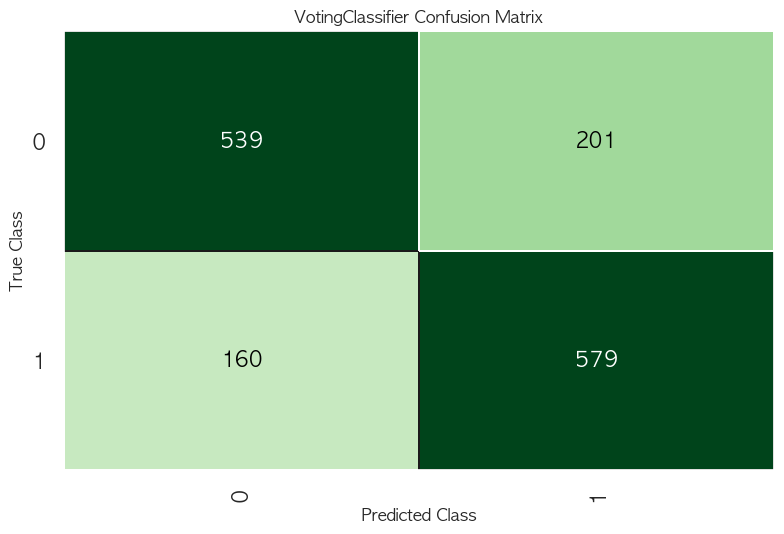

In [87]:
plot_model(ensemble_model,plot='confusion_matrix')

## 4.7 검증데이터로 평가

In [88]:
# 검증 예측
pred = predict_model(ensemble_model,data=X_val,verbose=True)

In [89]:
pred

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,EPHEV,FSBALANC,GENDER,HYPEV,HYPMDEV2,...,MRACRPI2_11.0,MRACRPI2_15.0,MRACRPI2_16.0,MRACRPI2_17.0,REGION_1.0,REGION_2.0,REGION_3.0,REGION_4.0,prediction_label,prediction_score
19619,0.669264,1.0,1.0,0.752928,1.0,0.0,1,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0.8650
14468,0.839627,1.0,1.0,-0.394781,1.0,0.0,0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0.8202
14109,-0.807214,0.0,0.0,-1.277502,0.0,0.0,0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0.5556
21532,-0.125763,0.0,1.0,-0.166559,0.0,0.0,0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0.5117
10648,-2.056542,1.0,0.0,-0.721475,0.0,0.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0.8162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,1.009990,0.0,1.0,-0.440649,1.0,1.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0.5134
17248,1.066778,1.0,0.0,-0.668373,0.0,0.0,0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0.5704
15178,-0.750427,1.0,0.0,1.021610,0.0,0.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.6255
490,0.271751,0.0,0.0,-0.299887,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0.7449


In [90]:
# 실제값 과 예측값 비교\
print(classification_report(y_val,pred['prediction_label'],target_names=['정상','당뇨']))

              precision    recall  f1-score   support

          정상       0.77      0.74      0.75       616
          당뇨       0.75      0.78      0.76       616

    accuracy                           0.76      1232
   macro avg       0.76      0.76      0.76      1232
weighted avg       0.76      0.76      0.76      1232



In [91]:
precision_score(y_val,pred['prediction_label'])

0.7476635514018691

In [92]:
recall_score(y_val,pred['prediction_label'])

0.7792207792207793

## 4.8 검증 데이터 기준 임계값 결정 

In [93]:
pred['predict_proba'] = pred['prediction_score']
pred.loc[pred['prediction_label']==0,'predict_proba'] = 1-pred.loc[pred['prediction_label']==0,'predict_proba']

#### 정밀도/재현율 그래프

In [94]:
# 정밀도 vs 재현율 그래프 그리기 위한 함수 정의
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # thredshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출 
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 thredshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')
    
    #thredshold 값 X축 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #X축, y축, label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

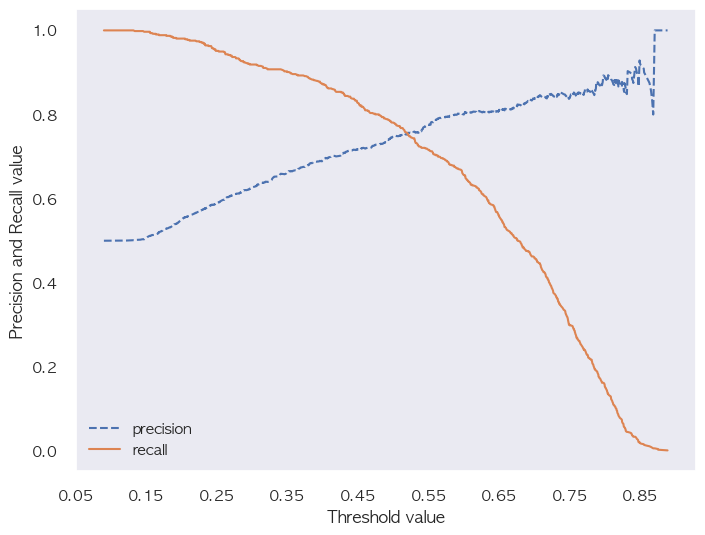

In [95]:
precision_recall_curve_plot(y_val,pred['predict_proba'])

In [96]:
f1_score_list = []
threshold_list = []
for j in range(10):
    j = 0.45+j*0.01
    # j = 0.485
    result = [0 if i<=j else 1 for i in pred['predict_proba']]
    score = f1_score(y_val,result)
    f1_score_list.append(score)
    threshold_list.append(j)
    print(f'임계값:{j} / f1_score : {round(score,3)} / recall : {round(recall_score(y_val,result),3)} / precision : {round(precision_score(y_val,result),3)}')

임계값:0.45 / f1_score : 0.768 / recall : 0.826 / precision : 0.717
임계값:0.46 / f1_score : 0.762 / recall : 0.81 / precision : 0.72
임계값:0.47000000000000003 / f1_score : 0.763 / recall : 0.804 / precision : 0.726
임계값:0.48 / f1_score : 0.763 / recall : 0.799 / precision : 0.73
임계값:0.49 / f1_score : 0.761 / recall : 0.789 / precision : 0.735
임계값:0.5 / f1_score : 0.763 / recall : 0.779 / precision : 0.748
임계값:0.51 / f1_score : 0.759 / recall : 0.768 / precision : 0.75
임계값:0.52 / f1_score : 0.753 / recall : 0.753 / precision : 0.752
임계값:0.53 / f1_score : 0.749 / recall : 0.74 / precision : 0.759
임계값:0.54 / f1_score : 0.741 / recall : 0.721 / precision : 0.763


In [97]:
# 성능상 큰 차이가 없으므로, 임계값은 기본값인 0.5로 지정
j = 0.5
# j = 0.485
result = [0 if i<=j else 1 for i in pred['predict_proba']]
score = f1_score(y_val,result)
f1_score_list.append(score)
threshold_list.append(j)
print(f'임계값:{j} / f1_score : {round(score,3)} / recall : {round(recall_score(y_val,result),3)} / precision : {round(precision_score(y_val,result),3)}')

임계값:0.5 / f1_score : 0.763 / recall : 0.779 / precision : 0.748


## 4.9 테스트 데이터 예측

In [98]:
# 검증 예측
pred = predict_model(ensemble_model,data=X_test,verbose=True)

In [99]:
pred

,AGE,ALCSTAT,ARTH1,BMI,CHLEV,EPHEV,FSBALANC,GENDER,HYPEV,HYPMDEV2,...,MRACRPI2_11.0,MRACRPI2_15.0,MRACRPI2_16.0,MRACRPI2_17.0,REGION_1.0,REGION_2.0,REGION_3.0,REGION_4.0,prediction_label,prediction_score
14291,0.555689,0.0,1.0,-0.687276,0.0,1.0,0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0.5411
10264,-0.012187,0.0,0.0,-1.181572,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.7960
22816,0.555689,0.0,1.0,-0.262287,1.0,0.0,0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0.7270
13409,0.669264,1.0,0.0,-0.657759,0.0,0.0,0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0.6907
4533,0.385326,0.0,0.0,-0.125871,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.7071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,-1.772604,0.0,0.0,-0.400411,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.8414
12345,-0.239338,0.0,0.0,0.387761,0.0,0.0,0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0.5820
11886,-0.409701,0.0,1.0,2.138274,1.0,0.0,0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0.7772
21850,-1.942967,0.0,0.0,-1.430842,0.0,0.0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.8722


## 4.10 테스트 데이터 예측값(확률) 정리

In [100]:
# 각 test데이터 별 결정 된 label마다의 확률이 저장 된 prediction_score를 기반으로 label 0,1 중 1에 대한 확률값을 가진 컬럼 정의 
pred['predict_proba'] = pred['prediction_score']
pred.loc[pred['prediction_label']==0,'predict_proba'] = 1-pred.loc[pred['prediction_label']==0,'predict_proba']

## 4.11 예측 확률값을 임계값 기준으로 최종 예측 값 정리

In [101]:
result = [0 if i<=j else 1 for i in pred['predict_proba']]

In [102]:
# id와 예측결과를 데이터프레임화
submission = pd.DataFrame({'id':test_id,'DIBEV1':result})
submission

,id,DIBEV1
14291,1000341491,1
10264,1000244291,0
22816,1000549251,1
13409,1000319411,0
4533,1000108881,0
...,...,...
10194,1000242741,0
12345,1000294541,1
11886,1000283481,1
21850,1000526061,0


In [103]:
submission.to_csv('DIABETES.csv',index=False)

In [104]:
# 실제값 과 예측값 비교
print(classification_report(y_test,result,target_names=['정상','당뇨']))

              precision    recall  f1-score   support

          정상       0.95      0.72      0.82       994
          당뇨       0.31      0.77      0.44       162

    accuracy                           0.72      1156
   macro avg       0.63      0.74      0.63      1156
weighted avg       0.86      0.72      0.76      1156



# 5. 예측 결과 시각화

## 5.1 변수 중요도 시각화

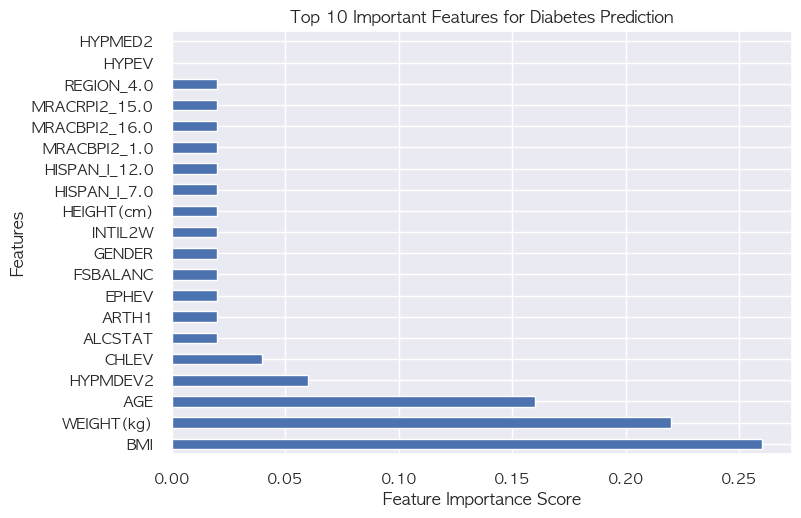

In [105]:
feature_importance = pd.Series(tuned_models[2].feature_importances_, index=tuned_models[2].feature_names_in_)

feature_importance.nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Diabetes Prediction')
plt.show()

변수들 중 당뇨와 연관이 있는 컬럼은

BMI(WEIGHT(kg) / HEIGHT(cm)) : BMI

AGE : 나이

CHLEV_0.0(1.0) : 콜레스테롤이 높다고 진단 받은적이 있는 지 유무

FSBALANC_1 : 균형 잡힌 식사를 하는지에 대한 유무로 1은 균형잡힌 식사를 하지 못하는 것을 의미

HYPMDEV2_0.0(1.0) & HYPMED2_0.0(1.0) : 과거 혈압약 복용 유무 / 혈압약 복용 유무

ALCSTAT : 음주 유무

ALTH1 : 관절염 유무

INTIL2W : 구토 / 위염 등 유무

HYPEV : 고혈압 진단 유무

MRACBPI2_1 : 인종 관련으로 1번은 백인종 / 미국내 당뇨 환자 중 히스패닉/아시아인 순서로 당뇨 환자수가 높다고 알려져 있어 인종 변수를 선택했으나 변수 영향력으로는 백인이 높은 것을 볼 수 있음

HISPAN_I_12 : 히스패닉 인종에 대한 컬럼으로 12번은 히스패닉이 아니며/ 스페인 사람을 의미 / 위의 인종 변수와 마찬가지로 미국내 히스패닉 계열이 당뇨 환자수가 많다고 알려져 있어 선택했으나 변수 영향력으로는 히스패닉이 아닌 사람이 변수 영향력이 높음

## 5.2 변수 중요도에 대한 당뇨 분포 차이

In [106]:
feature_importance.nlargest(6).index

Index(['BMI', 'WEIGHT(kg)', 'AGE', 'HYPMDEV2', 'CHLEV', 'ALCSTAT'], dtype='object')

In [143]:
pd.DataFrame(normalized_data).reset_index()

,CHLEV,DIBEV1,0
0,0.0,0,0.629758
1,0.0,1,0.051903
2,1.0,0,0.230104
3,1.0,1,0.088235


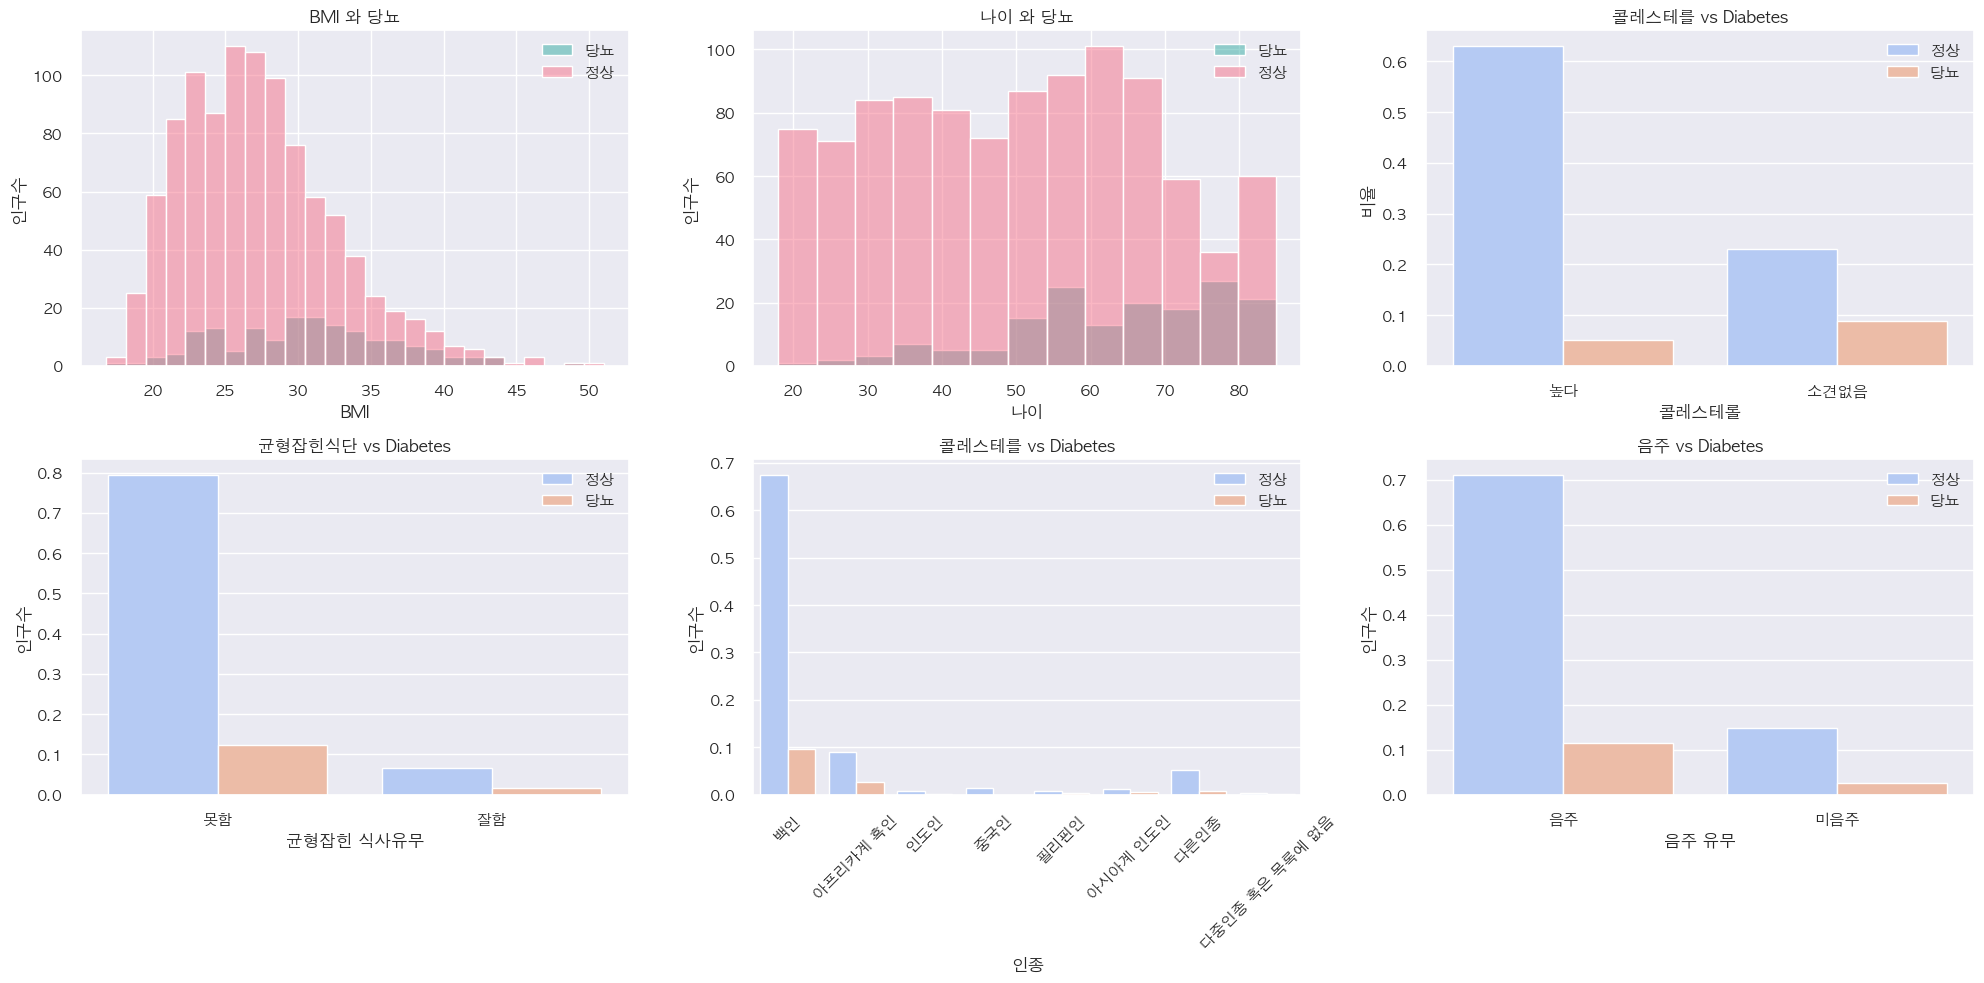

In [155]:
X_test_org['DIBEV1'] = y_test

plt.figure(figsize=(20, 10))

#BMI와 당뇨
plt.subplot(2, 3, 1)
sns.histplot(data=X_test_org, x='BMI', hue='DIBEV1', fill=True, palette='husl')
plt.title('BMI 와 당뇨')
plt.xlabel('BMI')
plt.ylabel('인구수')
plt.legend(['당뇨','정상'])

#나이와 당뇨
plt.subplot(2, 3, 2)
sns.histplot(data=X_test_org, x='AGE', hue='DIBEV1', fill=True, palette='husl')
plt.title('나이 와 당뇨')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.legend(['당뇨','정상'])



# 콜레스테롤과 당뇨
plt.subplot(2, 3, 3)
proportions = X_test_org.groupby(['CHLEV', 'DIBEV1']).size() / len(X_test_org)
proportions = proportions.reset_index(name='Proportion')
sns.barplot(x='CHLEV', y='Proportion', hue='DIBEV1', data=proportions, palette='coolwarm',ci=None)
plt.xlabel('콜레스테롤')
plt.xticks(ticks=[0, 1], labels=['높다', '소견없음'])
plt.ylabel('비율')
plt.title('콜레스테를 vs Diabetes')
plt.legend(title='Diabetes', loc='best')
plt.legend(['정상', '당뇨'])


#식단
plt.subplot(2, 3, 4)
proportions = X_test_org.groupby(['FSBALANC', 'DIBEV1']).size() / len(X_test_org)
proportions = proportions.reset_index(name='Proportion')
sns.barplot(x='FSBALANC', y='Proportion', hue='DIBEV1', data=proportions, palette='coolwarm',ci=None)
plt.xlabel('균형잡힌 식사유무')
plt.xticks(ticks=[0, 1], labels=['못함', '잘함'])
plt.ylabel('인구수')
plt.title(f'균형잡힌식단 vs Diabetes')
plt.legend(title='Diabetes', loc='best')
plt.legend(['정상','당뇨'])

#인종과 당뇨
plt.subplot(2, 3, 5)
proportions = X_test_org.groupby(['MRACBPI2', 'DIBEV1']).size() / len(X_test_org)
proportions = proportions.reset_index(name='Proportion')
sns.barplot(x='MRACBPI2', y='Proportion', hue='DIBEV1', data=proportions, palette='coolwarm',ci=None)
plt.xlabel('인종')
plt.xticks(ticks=np.arange(8), labels=['백인','아프리카계 흑인','인도인','중국인','필리핀인','아시아계 인도인','다른인종','다중인종 혹은 목록에 없음'],rotation=45)
plt.ylabel('인구수')
plt.title(f'콜레스테를 vs Diabetes')
plt.legend(title='Diabetes', loc='best')
plt.legend(['정상','당뇨'])

#음주 복용 이력 과 당뇨
plt.subplot(2, 3, 6)
proportions = X_test_org.groupby(['ALCSTAT', 'DIBEV1']).size() / len(X_test_org)
proportions = proportions.reset_index(name='Proportion')
sns.barplot(x='ALCSTAT', y='Proportion', hue='DIBEV1', data=proportions, palette='coolwarm',ci=None)
plt.xlabel('음주 유무')
plt.xticks(ticks=[0, 1], labels=['음주', '미음주'])
plt.ylabel('인구수')
plt.title(f'음주 vs Diabetes')
plt.legend(title='Diabetes', loc='best')
plt.legend(['정상','당뇨'])

plt.tight_layout()
plt.show()

## 5.3 실제값 vs 예측값 시각화

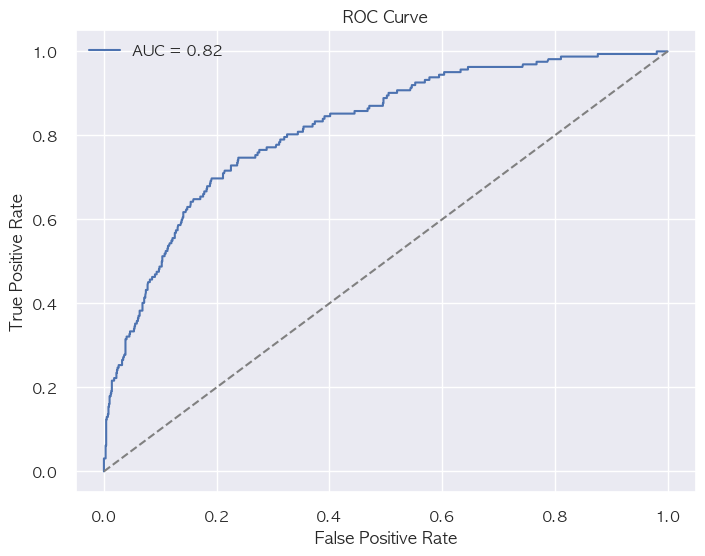

In [108]:
# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, pred['predict_proba'])
auc = roc_auc_score(y_test, pred['predict_proba'])

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


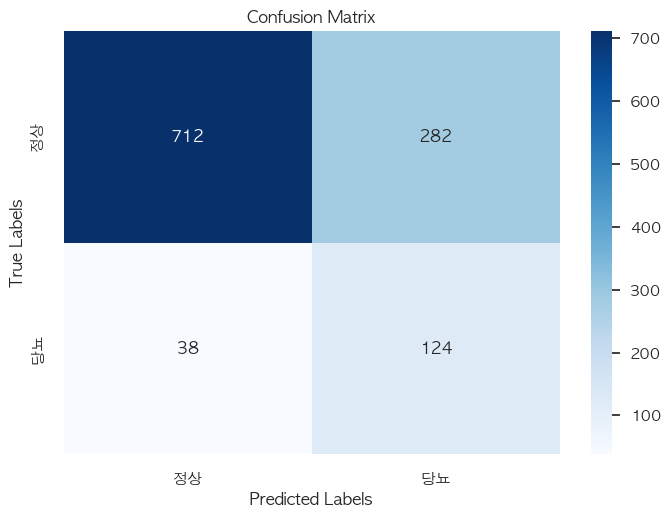

In [109]:
# 혼동 행렬 생성
cm = confusion_matrix(y_test, result)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['정상','당뇨'],yticklabels=['정상','당뇨'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [110]:
print(classification_report(y_test,result,target_names=['정상','당뇨']))

              precision    recall  f1-score   support

          정상       0.95      0.72      0.82       994
          당뇨       0.31      0.77      0.44       162

    accuracy                           0.72      1156
   macro avg       0.63      0.74      0.63      1156
weighted avg       0.86      0.72      0.76      1156



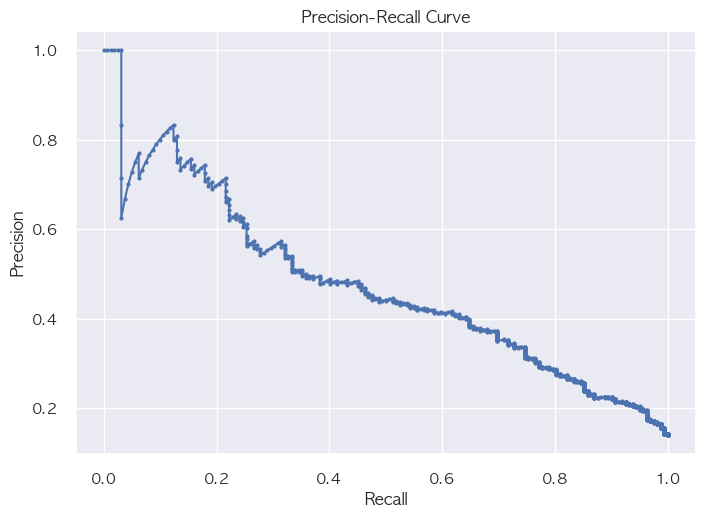

In [111]:
precision, recall, thresholds = precision_recall_curve(y_test, pred['predict_proba'])

# Precision-Recall Curve 시각화
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()